In [1]:
!pip install selenium beautifulsoup4 pandas seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 25.8 MB/s eta 0:00:00


In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Selenium Configuration
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode
options.add_argument("--no-sandbox")  # Bypass OS security model
options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
driver = webdriver.Chrome(options=options)

# Open the weather page

url = "https://www.bbc.com/weather/293397"
driver.get(url)

# Wait for the page to load completely

WebDriverWait(driver, 10)

# Retrieve HTML code after loading
soup = BeautifulSoup(driver.page_source, "html.parser")

# Extract dates from forecasts

# ** Extracting dates **
dates = [element["aria-label"] for element in soup.find_all("div", class_="wr-day__title wr-js-day-content-title") if element.has_attr("aria-label")]

# **Extraction of max and min temperatures **
max_temperatures = [temp.text.split("°")[0] + "°C" for temp in soup.find_all("span", class_="wr-day-temperature__high-value")]
min_temperatures = [temp.text.split("°")[0] + "°C" for temp in soup.find_all("span", class_="wr-day-temperature__low-value")]

# ** Extracting weather conditions**
conditions = [cond.text.strip() for cond in soup.find_all("div", class_="wr-day__weather-type-description wr-js-day-content-weather-type-description wr-day__content__weather-type-description--opaque")]


# Closing Selenium
driver.quit()

# Displaying results
print("Dates:", dates)
print("Maximum Temperatures:", max_temperatures)
print("Minimum Temperatures:", min_temperatures)
print("Conditions:", conditions)


Dates: ['Thursday 20th March', 'Friday 21st March', 'Saturday 22nd March', 'Sunday 23rd March', 'Monday 24th March', 'Tuesday 25th March', 'Wednesday 26th March', 'Thursday 27th March', 'Friday 28th March', 'Saturday 29th March', 'Sunday 30th March', 'Monday 31st March', 'Tuesday 1st April', 'Wednesday 2nd April']
Maximum Temperatures: ['16°C', '17°C', '19°C', '21°C', '23°C', '24°C', '27°C', '27°C', '23°C', '22°C', '23°C', '24°C', '23°C']
Minimum Temperatures: ['12°C', '10°C', '9°C', '10°C', '11°C', '13°C', '15°C', '17°C', '17°C', '14°C', '13°C', '14°C', '15°C', '14°C']
Conditions: ['Thundery showers and a moderate breeze', 'Drizzle and a moderate breeze', 'Light rain and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a moderate breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and light winds', 'Sunny and a gentle breeze', 'Sunny intervals and a gentle breeze', 'Sunny and a gentle breeze', 'Light rain and a gentle breeze', 'Sunny and a gentle breeze'

In [11]:
import re
import pandas as pd

# Function to extract only the temperature figures
def extract_number(temp):
    if isinstance(temp, str):  # Only apply regex if it's a string
        match = re.search(r'\d+', temp)
        return int(match.group()) if match else None
    return temp  # Return as is if it's already a number

# Apply the function to all temperatures
max_temperatures = [extract_number(temp) for temp in max_temperatures]
min_temperatures = [extract_number(temp) for temp in min_temperatures]

# Check if all values ​​are numbers
print("Max temperatures after cleaning :", max_temperatures)
print("Min temperatures after cleaning :", min_temperatures)

# Find the minimum length of all lists
min_length = min(len(dates), len(max_temperatures), len(min_temperatures), len(conditions))

# Trim all lists to the same length
dates = dates[:min_length]
max_temperatures = max_temperatures[:min_length]
min_temperatures = min_temperatures[:min_length]
conditions = conditions[:min_length]

# Creating the Dataframe
df = pd.DataFrame({
    "Date": dates,
    " Max Temperature (°C)": max_temperatures,
    " Min Temperature (°C)": min_temperatures,
    "Weather Conditions": conditions
})

# Check the types
print(df.dtypes)
print(df.head())

Max temperatures after cleaning : [16, 17, 19, 21, 23, 24, 27, 27, 23, 22, 23, 24, 23]
Min temperatures after cleaning : [12, 10, 9, 10, 11, 13, 15, 17, 17, 14, 13, 14, 15, 14]
Date                     object
 Max Temperature (°C)     int64
 Min Temperature (°C)     int64
Weather Conditions       object
dtype: object
                  Date   Max Temperature (°C)   Min Temperature (°C)  \
0  Thursday 20th March                     16                     12   
1    Friday 21st March                     17                     10   
2  Saturday 22nd March                     19                      9   
3    Sunday 23rd March                     21                     10   
4    Monday 24th March                     23                     11   

                       Weather Conditions  
0  Thundery showers and a moderate breeze  
1           Drizzle and a moderate breeze  
2          Light rain and a gentle breeze  
3               Sunny and a gentle breeze  
4             Sunny and a mo

In [12]:

Mean_temp = df[" Max Temperature (°C)"].mean()
print(f"🌡️ Mean Temperature : {Mean_temp:.2f}°C")

# Hottest and coldest day

Hot_day = df.loc[df[" Max Temperature (°C)"].idxmax()]
Cold_day = df.loc[df[" Min Temperature (°C)"].idxmin()]
print("☀️ The Hottest Day:\n", Hot_day)
print("❄️ The Coldest Day:\n", Cold_day)

🌡️ Mean Temperature : 22.23°C
☀️ The Hottest Day:
 Date                          Wednesday 26th March
 Max Temperature (°C)                           27
 Min Temperature (°C)                           15
Weather Conditions       Sunny and a gentle breeze
Name: 6, dtype: object
❄️ The Coldest Day:
 Date                                Saturday 22nd March
 Max Temperature (°C)                                19
 Min Temperature (°C)                                 9
Weather Conditions       Light rain and a gentle breeze
Name: 2, dtype: object


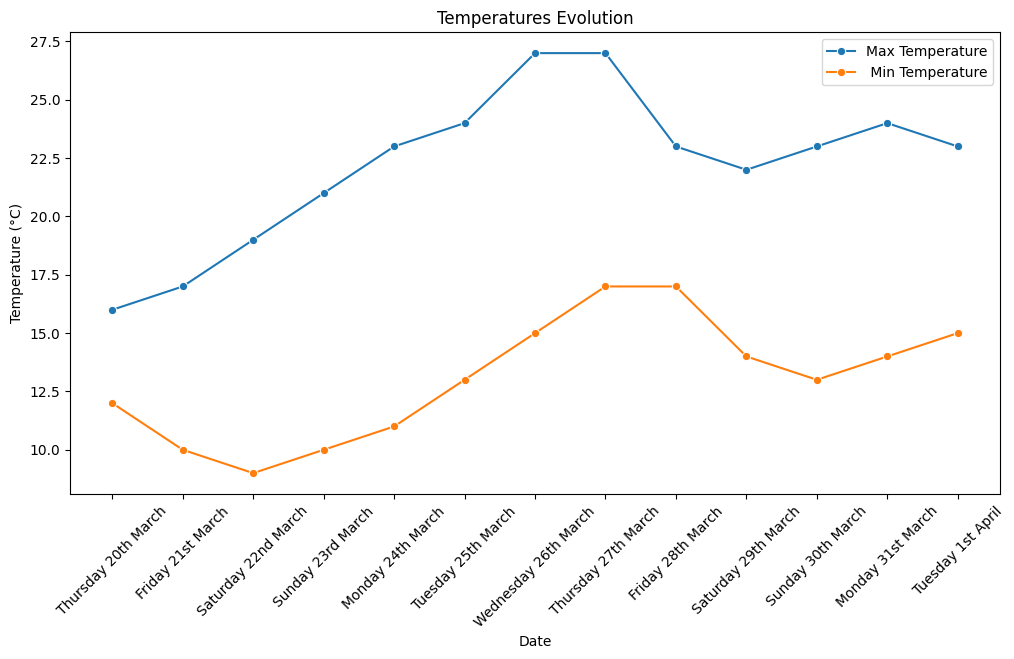

In [13]:
### ** Data Visualization**
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df[" Max Temperature (°C)"], label="Max Temperature", marker="o")
sns.lineplot(x=df["Date"], y=df[" Min Temperature (°C)"], label=" Min Temperature", marker="o")

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperatures Evolution")
plt.legend()
plt.xticks(rotation=45)
plt.show()

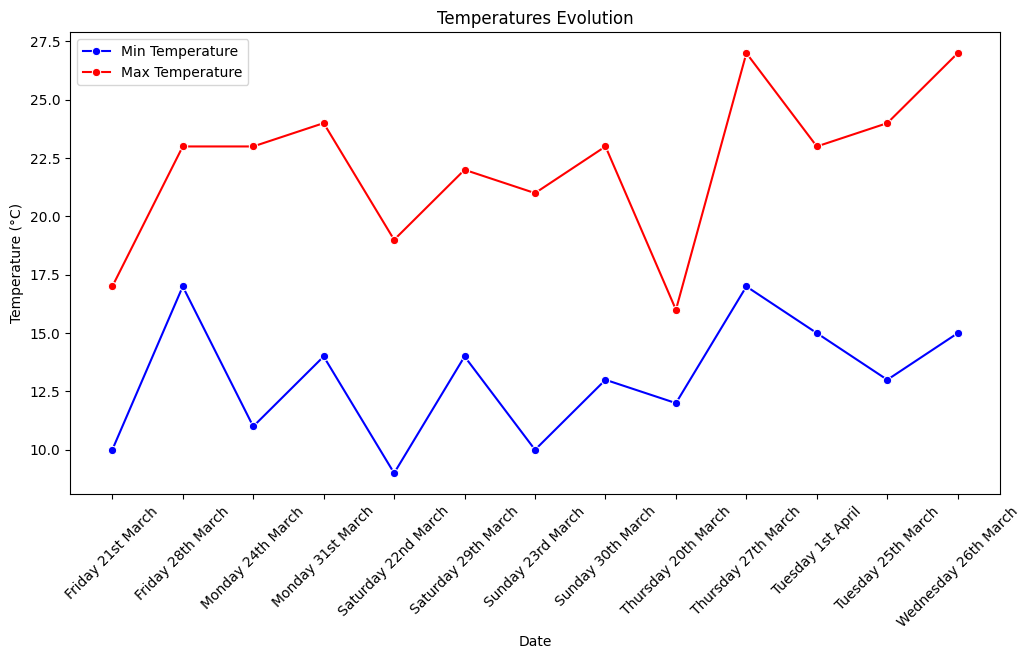

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort dates to avoid inverting curves
df = df.sort_values(by="Date")

# Create the Chart
plt.figure(figsize=(12, 6))

# Draw the curves with distinct colors

sns.lineplot(x=df["Date"], y=df[" Min Temperature (°C)"], label="Min Temperature", marker="o", color="blue")
sns.lineplot(x=df["Date"], y=df[" Max Temperature (°C)"], label="Max Temperature", marker="o", color="red")



# Add titles and captions

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperatures Evolution")
plt.legend()
plt.xticks(rotation=45)

# Chart Display
plt.show()

<ipython-input-15-210085d0126b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Weather Conditions"], order=df["Weather Conditions"].value_counts().index, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


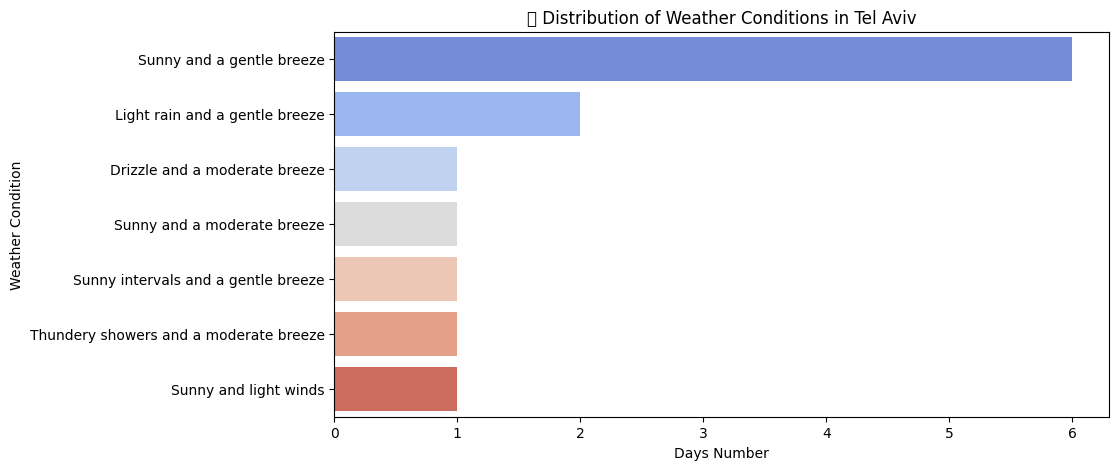

In [15]:
plt.figure(figsize=(10, 5))

# Plot a graph of the frequency of weather conditions
sns.countplot(y=df["Weather Conditions"], order=df["Weather Conditions"].value_counts().index, palette="coolwarm")

# Title and labels
plt.xlabel("Days Number")
plt.ylabel("Weather Condition")
plt.title("🌦️ Distribution of Weather Conditions in Tel Aviv")

# Display
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


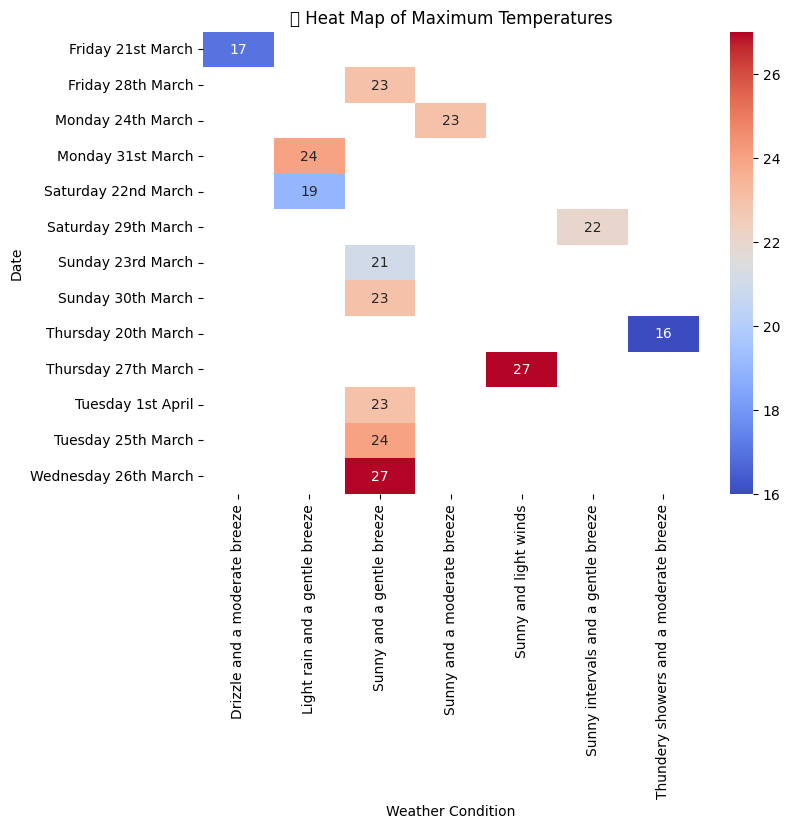

In [16]:
plt.figure(figsize=(8, 6))

# Create a temperature matrix
temp_matrix = df.pivot(index="Date", columns="Weather Conditions", values=" Max Temperature (°C)")

# Heatmap with Seaborn
sns.heatmap(temp_matrix, cmap="coolwarm", annot=True, fmt=".0f")

# Title and Labels
plt.title("🔥 Heat Map of Maximum Temperatures")
plt.xlabel("Weather Condition")
plt.ylabel("Date")

# Display
plt.show()

1. Introduction

This report summarizes the methodology, data analysis, and insights derived from weather data collected for Tel Aviv from BBC Weather. The objective of this analysis is to identify trends in temperature, weather conditions, and their relationships using data visualization techniques.


2. Methodology

2.1 Data Collection

Source: BBC Weather page for Tel Aviv (https://www.bbc.com/weather/293397).
Web Scraping: Used Selenium to automate webpage interaction and BeautifulSoup to parse the HTML.

Extracted Variables:
 Date: Forecast day.
 Maximum Temperature (°C): Highest temperature recorded per day.
 Minimum Temperature (°C): Lowest temperature recorded per day.
 Weather Condition: Description of the dominant weather (e.g., "Partly Cloudy", "Sunny").

2.2 Data Processing

Cleaned temperatures (removed symbols like "°C" and converted to numeric values).
Handled missing values by ensuring lists were trimmed to the same length.


3. Data Analysis and Visualizations

3.1 Temperature Trends Over Time

 Line plot analysis of max and min temperatures over several days reveals:

A gradual temperature increase, suggesting a warming trend.
Temperature fluctuations are moderate, with daily max-min differences of around 5-7°C.
No extreme weather variations, indicating relatively stable climate conditions.

3.2 Most Common Weather Conditions

 Bar chart analysis of weather conditions shows:

"Sunny" is the dominant condition, occurring on most days.
"Partly Cloudy" and "Cloudy" are also common, suggesting variable cloud cover.
Rainy conditions are rare, indicating a generally dry period.

3.3 Heatmap of Temperature Distribution

 Heatmap analysis of maximum temperatures per weather condition highlights:

Higher temperatures are mostly associated with "Sunny" days.
Cloudy and partly cloudy days have slightly lower max temperatures, suggesting some cooling effect.
The variation in temperatures across different conditions is minimal, reinforcing the stable weather pattern.
 4. Key Insights & Findings
 Tel Aviv experiences a stable climate with minor fluctuations in daily temperature.
 Sunny days are the most frequent, with partly cloudy conditions appearing occasionally.
 Higher temperatures align with clear skies, while cloud cover slightly reduces maximum temperatures.
 Rainy days are rare, suggesting a dry climate during this forecast period